# Water Quality Analysis and Classification Model
-----------

This code performs an analysis of water quality using tabular data. Data exploration includes feature normalization, identification of outliers using a boxplot, and outlier detection based on the interquartile range (IQR). Additionally, a Random Forest classification model is implemented to predict water potability.

## Main Steps:

1. **Data Exploration:**
   - Feature normalization using `StandardScaler`.
   - Identification of outliers using a boxplot and interquartile range (IQR).

2. **Additional Preprocessing:**
   - Encoding categorical variables (if necessary).

3. **Modeling:**
   - Utilization of a Random Forest classification model.

4. **Model Evaluation:**
   - Evaluation of model performance using metrics such as precision, recall, and confusion matrix.

5. **Hyperparameter Tuning:**
   - Search for optimal hyperparameters using GridSearchCV.

## Requirements:
   - Pandas
   - NumPy
   - Matplotlib
   - Seaborn
   - Scikit-learn


In [2]:
import pandas as pd  # For handling data in the form of dataframes
import numpy as np  # For numerical operations and mathematical calculations
import matplotlib.pyplot as plt  # For data visualization

import seaborn as sns  # For advanced data visualization

from sklearn.preprocessing import StandardScaler  # For data normalization
from sklearn.ensemble import RandomForestClassifier  # For the RandomForest classification model
from sklearn.model_selection import train_test_split  # For splitting the data into training and testing sets
from sklearn.metrics import classification_report, confusion_matrix  # For evaluating the model performance
from sklearn.model_selection import GridSearchCV  # For hyperparameter searching in the model

import joblib

In [4]:
# Read in the data
df = pd.read_csv('../drinking_water_potability.csv')

In [5]:
# Inicializa el escalador
scaler = StandardScaler()

In [6]:
df_normalized = df.copy()
df_normalized[df_normalized.columns[:-1]] = scaler.fit_transform(df[df.columns[:-1]])

In [7]:
df_normalized.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,0.259195,-0.139471,0.112415,0.838973,1.708954,-1.180651,1.273445,-1.286298,0
1,-2.110818,-2.036414,-0.385987,-0.307694,NaN,2.062575,0.270597,-0.622493,0.684218,0
2,0.638838,0.847665,-0.240047,1.360594,NaN,-0.094032,0.781117,0.001472,-1.167365,0
3,0.775374,0.547651,0.000493,0.592008,0.558106,-0.778830,1.255134,2.098969,0.848412,0
4,1.261849,-0.464429,-0.460249,-0.363698,-0.570898,-0.343939,-0.824357,-2.126974,0.138786,0


In [8]:
print(df_normalized.describe())

                 ph      Hardness        Solids   Chloramines       Sulfate  \
count  2.785000e+03  3.276000e+03  3.276000e+03  3.276000e+03  2.495000e+03   
mean   6.378301e-18 -3.491984e-16 -6.506802e-18 -3.806479e-16  1.025232e-16   
std    1.000180e+00  1.000153e+00  1.000153e+00  1.000153e+00  1.000200e+00   
min   -4.442062e+00 -4.530454e+00 -2.474344e+00 -4.277288e+00 -4.945255e+00   
25%   -6.196248e-01 -5.937372e-01 -7.239916e-01 -6.285247e-01 -6.297319e-01   
50%   -2.762954e-02  1.819424e-02 -1.238999e-01  5.068209e-03 -1.695860e-02   
75%    6.155904e-01  6.174333e-01  6.066532e-01  6.271058e-01  6.321013e-01   
max    4.340691e+00  3.855680e+00  4.472689e+00  3.793631e+00  3.556147e+00   

       Conductivity  Organic_carbon  Trihalomethanes     Turbidity  \
count  3.276000e+03    3.276000e+03     3.114000e+03  3.276000e+03   
mean   1.615856e-16    4.370402e-16    -3.856189e-16 -3.448605e-16   
std    1.000153e+00    1.000153e+00     1.000161e+00  1.000153e+00   
min   -3

### Manejo Adicional de Valores Atípicos

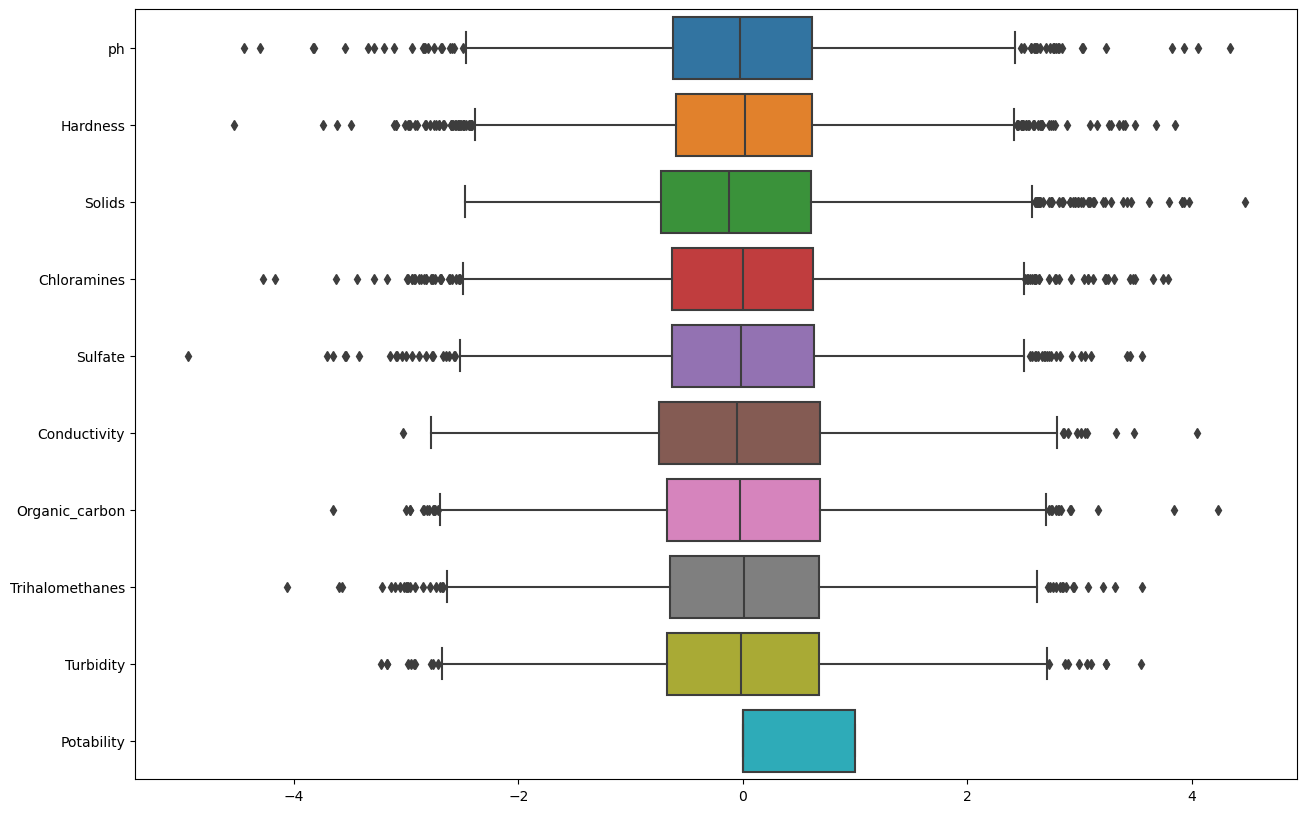

In [9]:
# Boxplot para identificar valores atípicos
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_normalized, orient='h')
plt.show()


In [10]:
# Cálculo del rango intercuartílico (IQR)
Q1 = df_normalized.quantile(0.25)
Q3 = df_normalized.quantile(0.75)
IQR = Q3 - Q1

# Identificación de valores atípicos basados en IQR
outliers = ((df_normalized < (Q1 - 1.5 * IQR)) | (df_normalized > (Q3 + 1.5 * IQR))).any(axis=1)


c:\Users\nesto\anaconda3\envs\deep_learning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


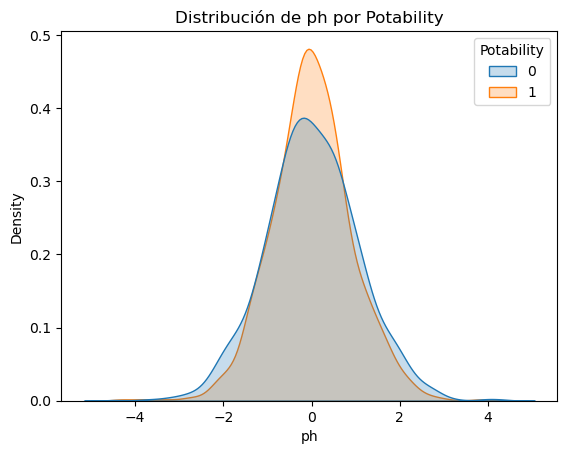

c:\Users\nesto\anaconda3\envs\deep_learning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


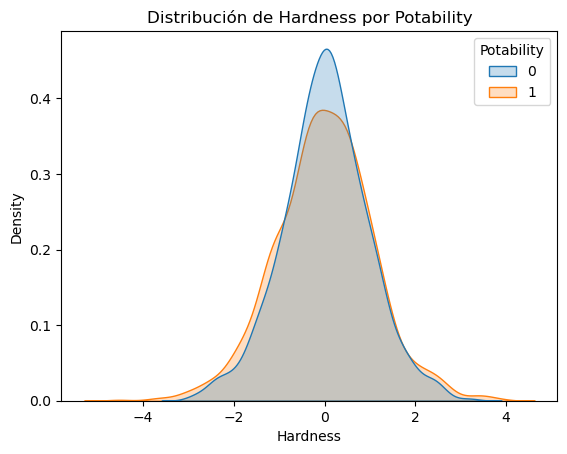

c:\Users\nesto\anaconda3\envs\deep_learning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


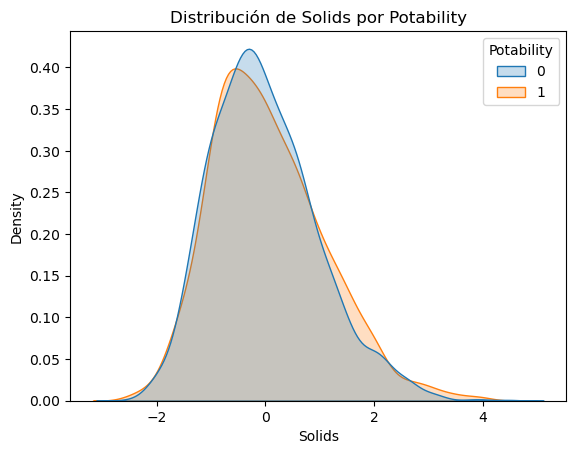

c:\Users\nesto\anaconda3\envs\deep_learning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


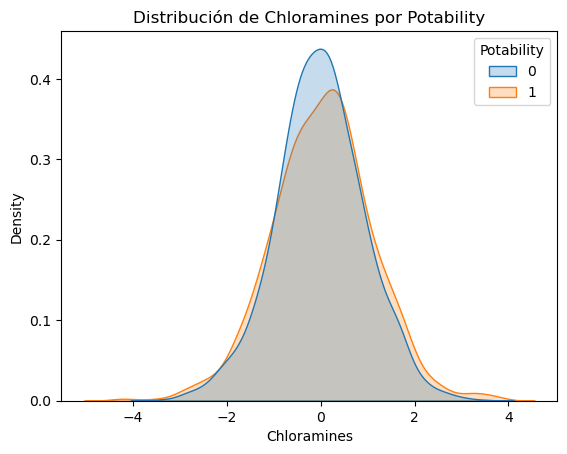

c:\Users\nesto\anaconda3\envs\deep_learning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


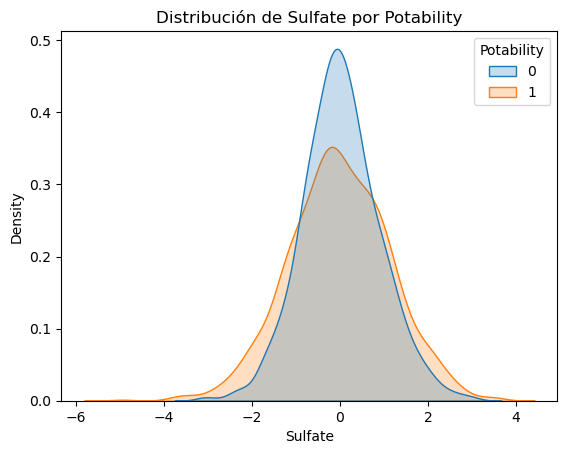

c:\Users\nesto\anaconda3\envs\deep_learning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


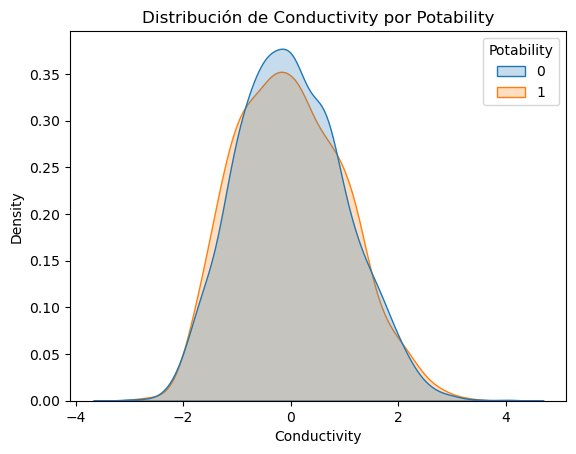

c:\Users\nesto\anaconda3\envs\deep_learning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


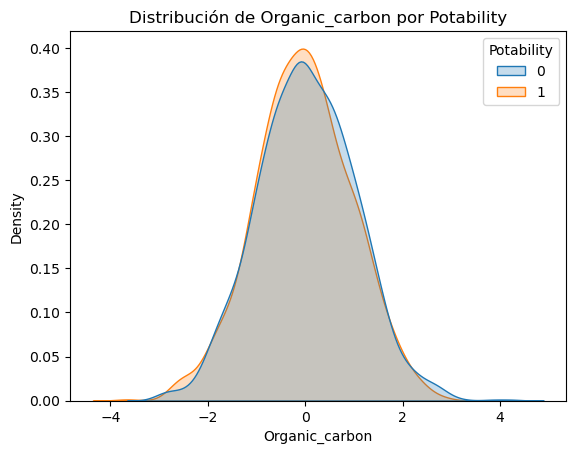

c:\Users\nesto\anaconda3\envs\deep_learning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


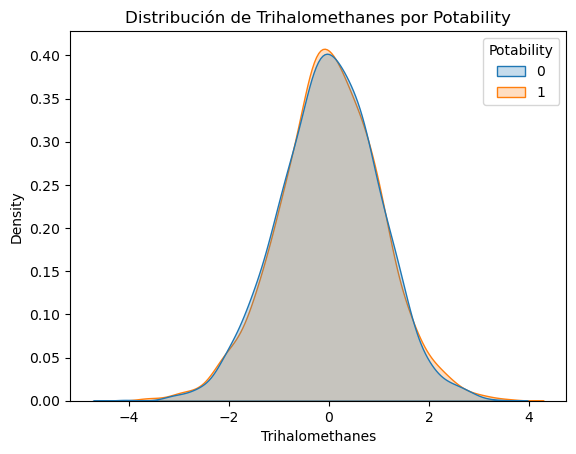

c:\Users\nesto\anaconda3\envs\deep_learning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


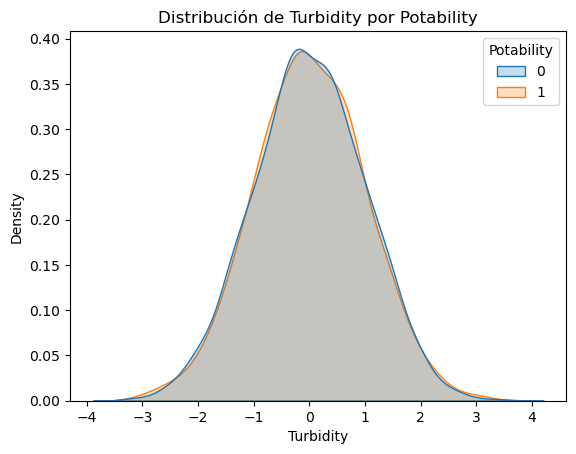

c:\Users\nesto\anaconda3\envs\deep_learning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nesto\AppData\Local\Temp\ipykernel_31724\3256588752.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_normalized, x=feature, hue='Potability', fill=True, common_norm=False)


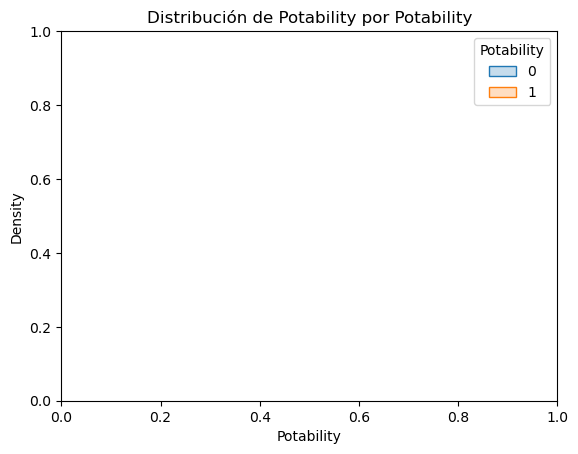

In [11]:
# Visualización de distribuciones después de la normalización
for feature in df_normalized.columns:
    sns.kdeplot(data=df_normalized, x=feature, hue='Potability', fill=True, common_norm=False)
    plt.title(f'Distribución de {feature} por Potability')
    plt.show()


In [59]:
# Check for Categorical Variables (if any, apply encoding)
categorical_columns = df.select_dtypes(include=['object']).columns

if not categorical_columns.empty:
    # Apply encoding (e.g., one-hot encoding)
    df_encoded = pd.get_dummies(df, columns=categorical_columns)
else:
    df_encoded = df.copy()


---------
### Model Selection:

Choose a model that fits the nature of your problem. 
Some common models for classification problems include Logistic Regression, Support Vector Machines (SVM), Random Forests, and Gradient Boosting.


In [60]:
# Inicializa el modelo (puedes elegir otro modelo según tus necesidades)
model = RandomForestClassifier(random_state=42)

### Model Training:

Split your data into training and testing sets, then train the model using the training set.


In [61]:
# División de datos
X_train, X_test, y_train, y_test = train_test_split(
    df_normalized.drop('Potability', axis=1), 
    df_normalized['Potability'], test_size=0.2, random_state=42)

In [62]:
# Entrenamiento del modelo
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Model Evaluation:

Evaluate the model's performance on the test set using relevant metrics for your problem. You can use precision, recall, F1-score, confusion matrix, among other metrics.


In [63]:
# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [64]:
# Evaluación del modelo
print(classification_report(y_test, y_pred))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.84      0.73       231
           1       0.65      0.40      0.50       172

    accuracy                           0.65       403
   macro avg       0.65      0.62      0.62       403
weighted avg       0.65      0.65      0.63       403

Matriz de Confusión:
[[194  37]
 [103  69]]


### Hyperparameter Tuning:

If necessary, you can adjust the model's hyperparameters to improve its performance.


In [65]:
# Definition of Hyperparameters to Tune
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}


In [66]:
# Model Initialization with Grid Search (GridSearchCV)
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200]})

In [67]:
# Best Found Hyperparameters
best_params = grid_search.best_params_


In [68]:
print(f"Best Hyperparameters: {best_params}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Mejores hiperparámetros: {'max_depth': 10, 'n_estimators': 200}
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.84      0.73       231
           1       0.65      0.40      0.50       172

    accuracy                           0.65       403
   macro avg       0.65      0.62      0.62       403
weighted avg       0.65      0.65      0.63       403

Confusion Matrix:
 [[194  37]
 [103  69]]


Model Evaluation Report:

Best Found Hyperparameters:

Max Depth: 10
Number of Estimators: 200

Model Results on the Test Set:

Overall Accuracy: 65%

              precision    recall  f1-score   support

           0       0.65      0.84      0.73       231
           1       0.65      0.40      0.50       172

    accuracy                           0.65       403
   macro avg       0.65      0.62      0.62       403
weighted avg       0.65      0.65      0.63       403

Confusion Matrix:
[[194  37]
 [103  69]]
